In [1]:
from datas import *
from preprocessing import *
from vocabulaire import *


# Données reconnaissance du locuteur (Chirac/Mitterrand)

In [2]:
alltxts,alllabs = load_pres()
print(len(alltxts),len(alllabs))
print("----------------------")
print(alltxts[0])
print("----------------------")
print(alllabs[0])

57413 57413
----------------------
 Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

----------------------
1


In [3]:
df=pd.DataFrame({"text":alltxts, "president":alllabs})
df.head()

,text,president
0,"Quand je dis chers amis, il ne s'agit pas là ...",1
1,D'abord merci de cet exceptionnel accueil que...,1
2,C'est toujours très émouvant de venir en Afri...,1
3,Aucun citoyen français ne peut être indiffére...,1
4,"Le Congo, que naguère le <nom> qualifia de ""r...",1


In [6]:
labels = df.president.unique()
print(f"labels des présidents: Chirac :{labels[0]} , Mitterand : {labels[1]}")

labels des présidents: Chirac :1 , Mitterand : -1


In [18]:
#Nombre de prises de parole par président
nb_prise_parole_C=(df["president"]==1).sum()
print("Nombre de prises de parole du président Chirac", nb_prise_parole_C)
nb_prise_parole_M=(df["president"]==-1).sum()
print("Nombre de prises de parole du président Mitterand", nb_prise_parole_M)

print("Chirac a un nombre de prises de parole ", int(nb_prise_parole_C/nb_prise_parole_M) ,"fois supérieur à celui de Mitterand, les classes sont clairement déséquilibrées")

Nombre de prises de parole du président Chirac 49890
Nombre de prises de parole du président Mitterand 7523
Chirac a un nombre de prises de parole  6 fois supérieur à celui de Mitterand, les classes sont clairement déséquilibrées


# A) Transformation paramétrique du texte (pre-traitements)

Vous devez tester, par exemple, les cas suivants:
- transformation en minuscule ou pas
- suppression de la ponctuation
- transformation des mots entièrement en majuscule en marqueurs spécifiques
- suppression des chiffres ou pas
- conservation d'une partie du texte seulement (seulement la première ligne = titre, seulement la dernière ligne = résumé, ...)
- stemming
- ...


Vérifier systématiquement sur un exemple ou deux le bon fonctionnement des méthodes sur deux documents (au moins un de chaque classe).

## Creation des datasets pretraites

Pretraitement Dataset Train

In [5]:
## Prétraitement en supprimant à partir d'une petite liste de stopwords. Effectué en amont
## Effectué en amont.
#df_few_sw = preprocess_president(df, spacy_model_size='lg', stop_words=False)
#df_few_sw.to_csv("./dataframes/df_president_lg_swF.csv", index=False)
#df_few_sw.head()

,text,president
0,quand dire cher ami agir la formule diploma...,1
1,abord merci exceptionnel accueil congolais ...,1
2,etre toujours tres emouvant venir afrique ca...,1
3,aucun citoyen francais pouvoir etre indiffer...,1
4,congo naguere nom qualifier refuge liber...,1
...,...,...
57408,etre heureux mener,1
57409,savoir comme avoir passion france,1
57410,croire avenir,1
57411,croire politique dire capacite collectif ...,1


In [6]:
## Prétraitement en supprimant à partir d'une grande liste de stopwords
## Effectué en amont.
#df_preprocessed_sw = preprocess_president(df, spacy_model_size='lg', stop_words=True)
#df_preprocessed_sw.to_csv("./dataframes/df_president_lg_sw.csv", index=False)
#df_preprocessed_sw.head()

Pretraitement Dataset Test

In [22]:
#alltxts_test = load_test_pres()
#df_test = pd.DataFrame({"text":alltxts_test})
#df_test.head()

,text
0,"En répondant à votre invitation, en effectuan..."
1,"Et ce moment exceptionnel, j'ai essayé de le ..."
2,Et le musée.\r\n
3,Je parlais en même temps que le Maire d'Anger...
4,<nom> devait plus tard n'y être pas pour rien...


In [ ]:
## Pretraitement du dataset de test en supprimant un nombre réduit de stopwords. 
## Effectué en amont.
#df_test_preprocessed = preprocess_president(df_test, spacy_model_size='lg', stop_words=False)
#df_test_preprocessed.to_csv("./dataframes/df_president_test_lg_swF.csv", index=False)
#df_test_preprocessed.head()

# B) Extraction du vocabulaire (BoW)

- **Exploration préliminaire des jeux de données**
    - Quelle est la taille d'origine du vocabulaire?
    - Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]
    - Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]
    - Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]
    - Quelle est la distribution d'apparition des mots (Zipf)
    - Quels sont les 100 bigrammes/trigrammes les plus fréquents?

- **Variantes de BoW**
    - TF-IDF
    - Réduire la taille du vocabulaire (min_df, max_df, max_features)
    - BoW binaire
    - Bi-grams, tri-grams
    - **Quelles performances attendre ? Quels sont les avantages et les inconvénients des ces variantes?**

## Exploration préliminaire des jeux de données

### Quelle est la taille d'origine du vocabulaire?

In [4]:
## Récupérer le dataframe du dataset prétraité
df_preprocessed = pd.read_csv("./dataframes/df_president_lg_swF.csv")

In [5]:
dic_size_original, mots_orignal, _ = get_vocabulaire(df)
dic_size_preprocessed, mots_preprocessed, _ = get_vocabulaire(df_preprocessed)

print('La taille du vocabulaire avant preprocessing est : ', dic_size_original)
print('Le vocabulaire avant preprocessing est : ', mots_orignal)
print()
print('La taille du vocabulaire après preprocessing est : ', dic_size_preprocessed)
print('Le vocabulaire après preprocessing est : ', mots_preprocessed)
print()
reduction = (1-(dic_size_preprocessed/dic_size_original))*100
print(f'Le vocabulaire a été réduit de {round(reduction, 2)} %')

La taille du vocabulaire avant preprocessing est :  28524
Le vocabulaire avant preprocessing est :  ['000' '10' '100' ... 'ôtent' 'ôter' 'ôté']

La taille du vocabulaire après preprocessing est :  15529
Le vocabulaire après preprocessing est :  ['aaron' 'ab' 'abaissement' ... 'zouave' 'zurich' 'zx']

Le vocabulaire a été réduit de 45.56 %


In [6]:
dic_size_preprocessed, mots_preprocessed, _ = get_vocabulaire(df_preprocessed, min__df=10, max__df=0.9)

print('La taille du vocabulaire après preprocessing et application \nde min/max df est : ', dic_size_preprocessed)
print('Le vocabulaire après preprocessing et min/max df est : ', mots_preprocessed)
print()
reduction = (1-(dic_size_preprocessed/dic_size_original))*100
print(f'Le vocabulaire a été réduit de {round(reduction, 2)} %')

La taille du vocabulaire après preprocessing et application 
de min/max df est :  4564
Le vocabulaire après preprocessing et min/max df est :  ['abaisser' 'abandon' 'abandonner' ... 'yougoslavie' 'zero' 'zone']

Le vocabulaire a été réduit de 84.0 %


#### Que reste-t-il si on ne garde que les 100 mots les plus fréquents? [word cloud]

In [7]:
dic_size_preprocessed_1, mots_1, dictionnaire_mots_freq_1 = get_vocabulaire(df_preprocessed, top=100)
print('Les 100 mots les plus fréquents dans le dataset sont :\n', mots_1)

Les 100 mots les plus fréquents dans le dataset sont :
 ['abord' 'action' 'agir' 'aller' 'an' 'annee' 'aujourdhui' 'aussi' 'autre'
 'avenir' 'avoir' 'beaucoup' 'bien' 'celer' 'celui' 'chacun' 'chaque'
 'comme' 'connaitre' 'contre' 'date' 'depuis' 'deux' 'developpement'
 'devoir' 'dire' 'domaine' 'donner' 'dont' 'droit' 'economique' 'effort'
 'emploi' 'encore' 'enfin' 'engager' 'ensemble' 'entreprise' 'entrer'
 'etat' 'etre' 'europe' 'europeen' 'faire' 'falloir' 'force' 'fort'
 'francais' 'france' 'grand' 'histoire' 'homme' 'ici' 'international'
 'jeune' 'la' 'liberte' 'mettre' 'mieux' 'monde' 'monsieur' 'moyen'
 'national' 'nom' 'notamment' 'nouveau' 'ou' 'paix' 'parce' 'pays'
 'permettre' 'peuple' 'place' 'plus' 'politique' 'pouvoir' 'premier'
 'prendre' 'president' 'public' 'quelque' 'sans' 'savoir' 'securite'
 'service' 'si' 'social' 'societe' 'souhaiter' 'temps' 'tenir' 'toujours'
 'tout' 'travail' 'tres' 'union' 'venir' 'vie' 'voir' 'vouloir']


##### Visualisation en wordcloud

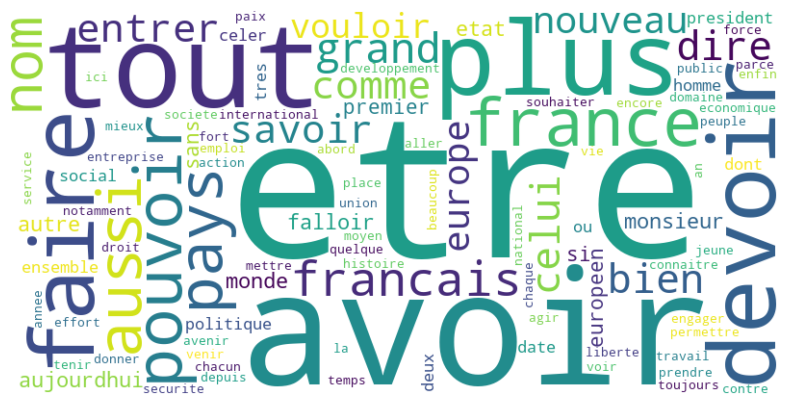

In [8]:
visualiser_wordcloud(dictionnaire_mots_freq_1)

##### 100 mots les plus frequents de Chirac

Le vocabulaire des reviews positives est :
 ['abord' 'action' 'agir' 'ainsi' 'aller' 'an' 'annee' 'aujourdhui' 'aussi'
 'autre']...


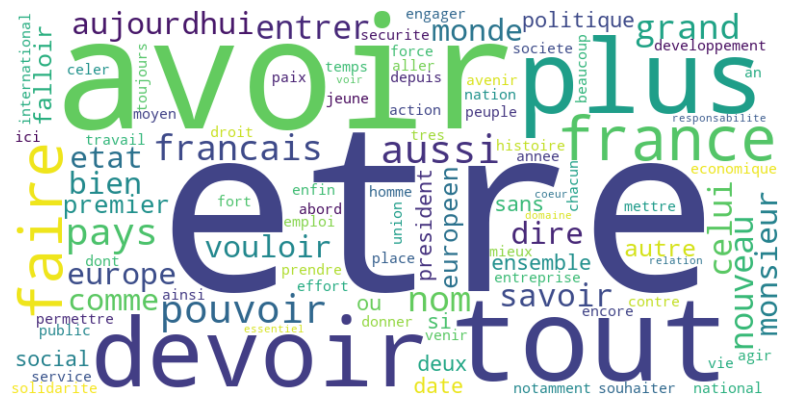

In [6]:
## Récupérer les phrases de Chirac
df_chirac = (df_preprocessed.loc[df['president'] == 1])
dic_size_chirac, mots_chirac, dictionnaire_mots_freq_chirac = get_vocabulaire(df_chirac, top=100)
print(f'Le vocabulaire des reviews positives est :\n {mots_chirac[:10]}...')
visualiser_wordcloud(dictionnaire_mots_freq_chirac)

##### 100 mots plus frequents de Mitterand

Le vocabulaire de Mitterrand est :
['aller' 'alors' 'an' 'annee' 'apres' 'aujourdhui' 'aussi' 'autre' 'avoir'
 'beaucoup']...


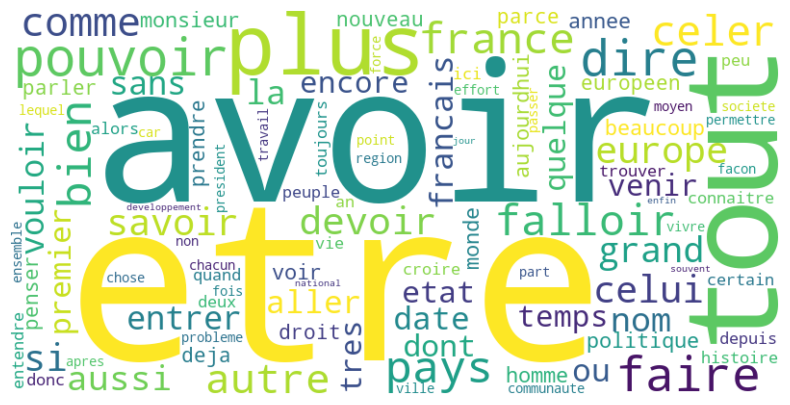

In [7]:
## Récupérer les phrases de Mitterrand
df_mitterrand = (df_preprocessed.loc[df['president'] == -1])
dic_size_mitterrand, mots_mitterrand, dictionnaire_mots_freq_mitterrand = get_vocabulaire(df_mitterrand, top=100)

print(f'Le vocabulaire de Mitterrand est :\n{mots_mitterrand[:10]}...')
visualiser_wordcloud(dictionnaire_mots_freq_mitterrand)

#### Quels sont les 100 mots dont la fréquence documentaire est la plus grande? [word cloud]

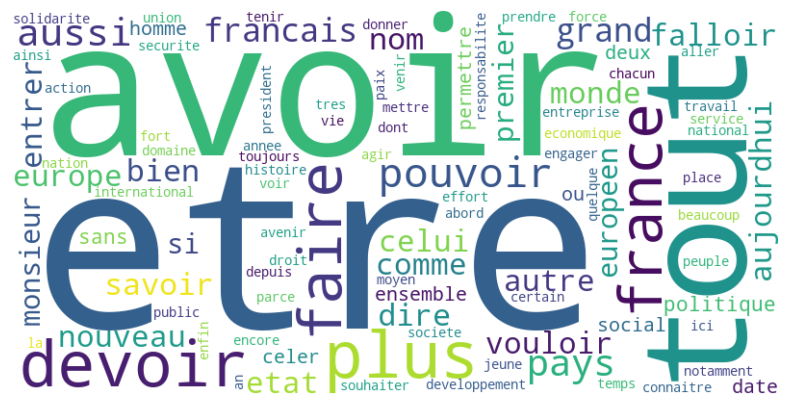

In [8]:
vectorizer = CountVectorizer(binary=True)
bow_binaire = vectorizer.fit_transform(df_preprocessed.text)  
bow_binaire = bow_binaire.toarray()

frequence_documentaire_mots = np.sum(bow_binaire, axis=0)

dict_mot_freq_docu = dict(zip(mots_preprocessed,frequence_documentaire_mots)) # Creer un dictionnaire qui associe à chaque mot, le nombre de documents dans lesquels il apparait

#Trier le dictionnaire selon les fréquences des mots
dict_mot_freq_docu_trie = dict(sorted(dict_mot_freq_docu.items(), key=lambda item: item[1], reverse=True))


#Récupérer les n mots les plus fréquents
n_mots_freq_docu = dict(list(dict_mot_freq_docu_trie.items())[:100])

visualiser_wordcloud(n_mots_freq_docu)

#### Quels sont les 100 mots les plus discriminants au sens de odds ratio? [word cloud]

Mots plus discriminants pour Chirac
['achat', 'adam', 'blanchet', 'compatibilite', 'couvent', 'byzantin', 'clandestinement', 'depasson', 'afrique', 'definisson', 'centraliser', 'devise', 'contraste', 'analphabetisme', 'chanson', 'brocardent', 'btp', 'diner', 'cadas', 'coincidant', 'brassage', 'carbonea', 'consideration', 'delectation', 'attitude', 'credit', 'biere', 'citadin', 'decime', 'barriere', 'collaboration', 'cousin', 'demarrer', 'cendre', 'actualisation', 'burke', 'cauchemar', 'connaissai', 'avignon', 'charite', 'cheminer', 'colza', 'dechet', 'acct', 'affaiblir', 'banja', 'cesson', 'convivial', 'armistice', 'constitutiver', 'democratiser', 'destructurer', 'acheminement', 'chatier', 'decoratif', 'albanie', 'beninois', 'bissau', 'defensif', 'affirmon', 'agent', 'allege', 'autoorganisation', 'comparon', 'deferlement', 'affaiblissement', 'apreskyoto', 'bienveillance', 'contribuerez', 'deguise', 'atd', 'detacher', 'accessible', 'allie', 'aristide', 'batave', 'confererons', 'cyclone'

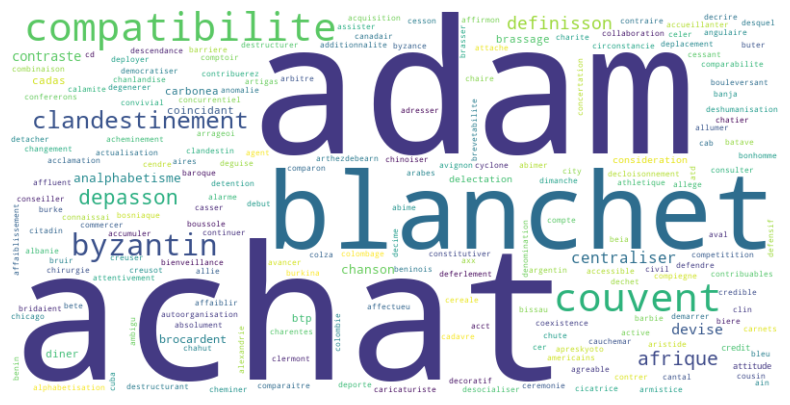


Mots plus discriminants pour Mitterrand
['bienfait', 'combien', 'appelons', 'continuons', 'amman', 'demander', 'atrocite', 'daubenton', 'compris', 'arrachage', 'aboutir', 'chinon', 'champs', 'chere', 'cordialite', 'arrierepays', 'alcatel', 'connu', 'apport', 'accroupir', 'aleatoire', 'antagonisme', 'brider', 'comesa', 'casernement', 'chanteur', 'constance', 'differencie', 'abattre', 'diligence', 'amelioration', 'agen', 'cloner', 'atmospherique', 'bouvines', 'coopereron', 'antigua', 'devenu', 'demiclandestinite', 'apresgenome', 'biotheque', 'concour', 'dam', 'brise', 'appareiller', 'culture', 'aimer', 'chanter', 'clientele', 'derain', 'colon', 'apotheose', 'constatation', 'cook', 'debordement', 'cherchon', 'clarte', 'braslecorps', 'avertie', 'aurion', 'centime', 'agroscience', 'broche', 'converge', 'avancement', 'affermie', 'allier', 'balayer', 'cimaise', 'close', 'diffuser', 'amistad', 'antiguo', 'depute', 'caduc', 'aspect', 'avanthier', 'attractif', 'antinomie', 'beauvais', 'concept'

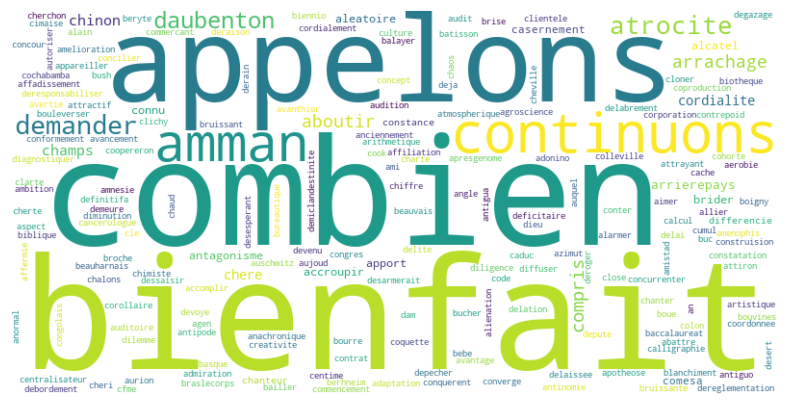

In [9]:
mots_plus_discriminants_chirac, dict_odds_ratio_chirac = get_mots_discriminants_odds_ratio(1, "president", df_preprocessed, mots_preprocessed, dic_size_chirac, dic_size_mitterrand, N_mots_discriminants=100 )
mots_plus_discriminants_mitterrand, dict_odds_ratio_mitterrand = get_mots_discriminants_odds_ratio(-1, "president", df_preprocessed, mots_preprocessed, dic_size_mitterrand, dic_size_chirac, N_mots_discriminants=100 )
print("Mots plus discriminants pour Chirac")
print(mots_plus_discriminants_chirac) 
visualiser_wordcloud(dict_odds_ratio_chirac)
print()
print("Mots plus discriminants pour Mitterrand")
print(mots_plus_discriminants_mitterrand)  
visualiser_wordcloud(dict_odds_ratio_mitterrand)

#### Distribution d'apparition des mots (Zipf)

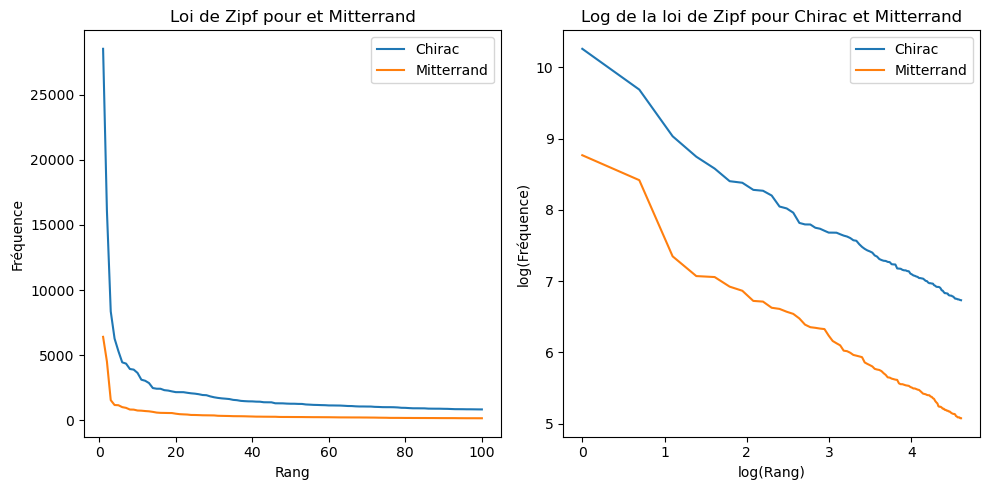

In [13]:
dictionnaire_mots_chirac_trie =  dict(sorted(dictionnaire_mots_freq_chirac.items(), key=lambda item: item[1], reverse=True))
dictionnaire_mots_mitterand_trie =  dict(sorted(dictionnaire_mots_freq_mitterrand.items(), key=lambda item: item[1], reverse=True))

taille_vocab_min = min(len(dictionnaire_mots_mitterand_trie),len(dictionnaire_mots_chirac_trie))

rangs = list(range(1, taille_vocab_min+1))
y_chirac = list(dictionnaire_mots_chirac_trie.values())[:taille_vocab_min]
y_mitterand = list(dictionnaire_mots_mitterand_trie.values())[:taille_vocab_min]

tracer_loi_de_zipf(rangs, y_chirac, y_mitterand, label_positif='Chirac', label_negatif='Mitterrand')

Quels sont les 100 bigrammes/trigrammes les plus fréquents?

In [14]:
dic_size_bi_grammes, bi_grammes, dict_bi_grammes = get_vocabulaire(df_preprocessed, top=100, n_gramme=(2,2))
bi_grammes[:20]

array(['avoir avoir', 'avoir besoin', 'avoir bien', 'avoir deja',
       'avoir dire', 'avoir etre', 'avoir evoquer', 'avoir faire',
       'avoir permettre', 'avoir plus', 'avoir pouvoir', 'avoir prendre',
       'avoir savoir', 'avoir souhaiter', 'avoir toujours', 'avoir tout',
       'avoir voir', 'avoir vouloir', 'bien entendre', 'bien sur'],
      dtype=object)

In [15]:
dic_size_tri_grammes, tri_grammes, dict_tri_grammes = get_vocabulaire(df_preprocessed, top=100, n_gramme=(3,3))
tri_grammes[:20]

array(['aide public developpement', 'aller plus loin',
       'avoir avoir occasion', 'avoir besoin etre', 'avoir bien vouloir',
       'avoir deja etre', 'avoir dire tout', 'avoir etre accomplir',
       'avoir etre faire', 'avoir etre prendre', 'avoir etre tres',
       'avoir evoquer monsieur', 'avoir faire choix',
       'avoir faire preuve', 'avoir jamais etre', 'avoir pouvoir etre',
       'avoir savoir faire', 'avoir toujours etre', 'bien sur aussi',
       'celer aller soi'], dtype=object)

In [23]:
dic_size_bi_tri_grammes, bi_tri_grammes, dict_bi_tri_grammes = get_vocabulaire(df_preprocessed, top=100, n_gramme=(2,3))
bi_tri_grammes[:20]

array(['avoir avoir', 'avoir besoin', 'avoir bien', 'avoir deja',
       'avoir dire', 'avoir etre', 'avoir evoquer', 'avoir faire',
       'avoir permettre', 'avoir plus', 'avoir pouvoir', 'avoir prendre',
       'avoir savoir', 'avoir souhaiter', 'avoir toujours', 'avoir tout',
       'avoir voir', 'avoir vouloir', 'bien entendre', 'bien sur'],
      dtype=object)

## Variante TF-IDF

### Vocabulaire

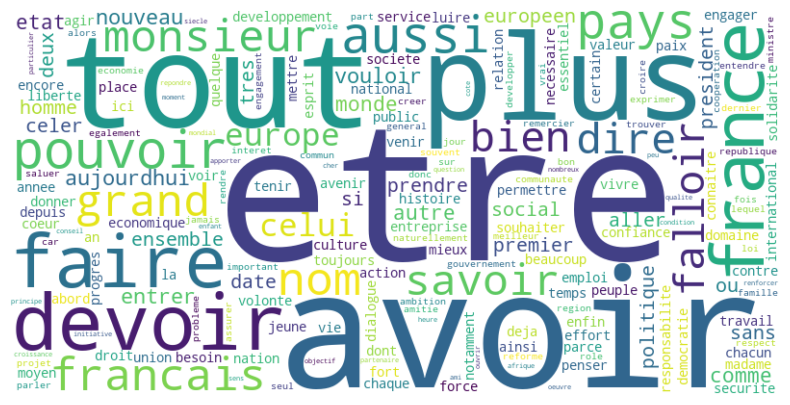

In [17]:
dict_size, mots, dict_scores = get_vocabulaire(df_preprocessed, type_vectorizer=TfidfVectorizer,  top=None, n_gramme=(1,1))
visualiser_wordcloud(dict_scores)

### Vocabulaire de Chirac

['ab' 'abaissement' 'abaisser' 'abandon' 'abandonner' 'abattage' 'abattre'
 'abbaye' 'abbayeauxdame' 'abbayeauxhommes' 'abbe' 'abc' 'abces'
 'abdication' 'abdiquer' 'abdou' 'abdul' 'abeba' 'aberrant' 'aberration']


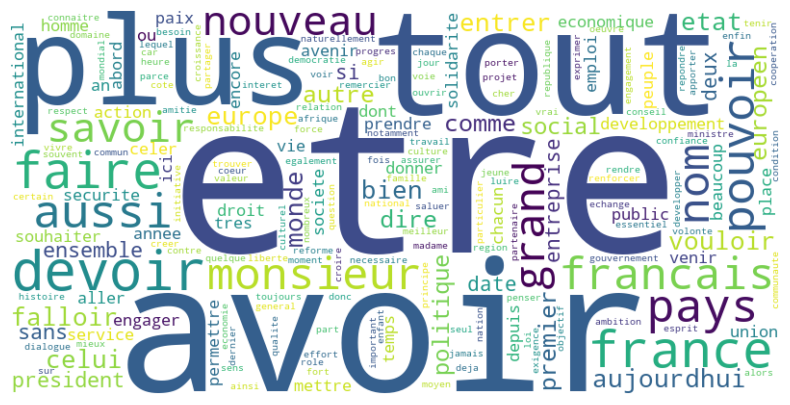

In [18]:
dic_size_chirac, mots_chirac, dictionnaire_mots_chirac = get_vocabulaire(df_chirac, type_vectorizer=TfidfVectorizer)
print(mots_chirac[:20])
visualiser_wordcloud(dictionnaire_mots_chirac)

### Vocabulaire de Mitterrand

['aller' 'alors' 'an' 'annee' 'apres' 'aujourdhui' 'aussi' 'autre' 'avoir'
 'beaucoup' 'bien' 'car' 'celer' 'celui' 'certain' 'chacun' 'chose'
 'comme' 'communaute' 'connaitre']


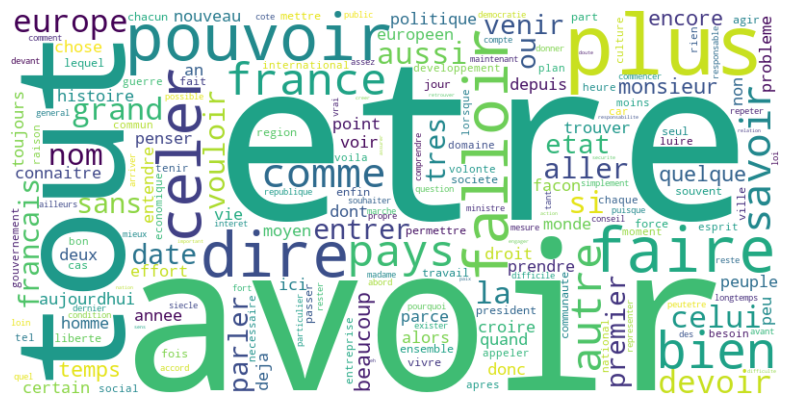

In [11]:
dic_size_mitterand, mots_mitterand, dictionnaire_mots_mitterand = get_vocabulaire(df_mitterrand, type_vectorizer=TfidfVectorizer)
print(mots_mitterrand[:20])
visualiser_wordcloud(dictionnaire_mots_mitterand)